# Basics of Pandas

The last few weeks we have been using low-level methods to read data in to Python and manipulate it.  This week we will be exploring [pandas](http://pandas.pydata.org/) to accelerate this process.

Pandas is based around the notion that arrays can be indexed in a flexible manner, and that we can structure our data access around the indexing labels.

We will start out, as we often do, by applying our boilerplate setup.

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

Pandas provides a number of `read_*` options, including `read_csv`, which we will use here.

One important note about `read_csv` in particular is that there are over 50 possible arguments to it.  This allows for intensely flexible specification of how to read data in, how to parse it, and very detailed control over things like encoding of files and so forth.  This flexibility is designed to eliminate the need to pre-process any data files before importing, but it can also make for a complex import process if you only have to adjust a few columns.  We will use this in some of its more simple ways here.

Below, we read the building inventory file into an object called `df` (for Data Frame).

In [5]:
df = pd.read_csv("data-readonly/IL_Building_Inventory.csv")

One of the first things we can do is examine the columns that the dataframe has identified.

In [6]:
df.columns

Index(['Agency Name', 'Location Name', 'Address', 'City', 'Zip code', 'County',
       'Congress Dist', 'Congressional Full Name', 'Rep Dist', 'Rep Full Name',
       'Senate Dist', 'Senator Full Name', 'Bldg Status', 'Year Acquired',
       'Year Constructed', 'Square Footage', 'Total Floors',
       'Floors Above Grade', 'Floors Below Grade', 'Usage Description',
       'Usage Description 2', 'Usage Description 3'],
      dtype='object')

In [9]:
df.head()

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975,1975,144,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided


In [11]:
df.tail()

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
8857,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte. 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,0,0,432,1,0,0,Storage,NaN,NaN
8858,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,0,0,330,1,0,0,Storage,NaN,NaN
8859,Department of Transportation,Quincy Maintenance Storage Facility,800 Koch's Lane,Quincy,62305,Adams,18,Darin M. LaHood,94,Frese Randy E.,...,In Use,0,1987,130,1,0,0,Storage,High Hazard,NaN
8860,Illinois Community College Board,Illinois Valley Community College - Oglesby,815 North Orlando Smith Avenue,Oglesby,61348,LaSalle,16,Adam Kinzinger,76,Long Jerry Lee,...,In Use,1971,1971,49552,1,1,0,Education,Education,Not provided
8861,Department of Military Affairs,Peoria Army Aviation Support Facility,2323 S. Airport Rd,Peoria,61607,Peoria,17,Cheri Bustos,92,Gordon-Booth Jehan,...,In Progress,0,2017,288,1,0,0,Utiility & Miscellan,Utiility & Miscellan,NaN


In [23]:
df.describe()

,Zip code,Congress Dist,Rep Dist,Senate Dist,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade
count,8862.000000,8862.000000,8862.000000,8862.000000,8862.000000,8862.000000,8.862000e+03,8862.000000,8862.000000,8862.000000
mean,61821.076845,13.404085,92.303318,46.408599,1972.593320,1906.135184,1.147603e+04,1.636087,1.449334,0.161589
std,1095.203357,4.037936,23.568457,11.781038,27.491941,351.180642,3.817263e+04,1.537603,1.286898,0.392717
min,1235.000000,0.000000,0.000000,0.000000,1753.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,61105.000000,12.000000,79.000000,40.000000,1960.000000,1953.000000,2.330000e+02,1.000000,1.000000,0.000000
50%,62023.000000,14.000000,97.000000,49.000000,1976.000000,1974.000000,1.600000e+03,1.000000,1.000000,0.000000
75%,62650.000000,16.000000,110.000000,55.000000,1993.000000,1991.000000,6.426500e+03,2.000000,1.000000,0.000000
max,68297.000000,18.000000,119.000000,60.000000,2019.000000,2019.000000,1.200000e+06,31.000000,30.000000,4.000000


In [24]:
df.dtypes

Agency Name                object
Location Name              object
Address                    object
City                       object
Zip code                    int64
County                     object
Congress Dist               int64
Congressional Full Name    object
Rep Dist                    int64
Rep Full Name              object
Senate Dist                 int64
Senator Full Name          object
Bldg Status                object
Year Acquired               int64
Year Constructed            int64
Square Footage              int64
Total Floors                int64
Floors Above Grade          int64
Floors Below Grade          int64
Usage Description          object
Usage Description 2        object
Usage Description 3        object
dtype: object

In [28]:
df.groupby(["Agency Name"])["Square Footage"].sum()

Agency Name
Appellate Court / Fifth District                15124
Appellate Court / Fourth District               16400
Appellate Court / Second District               43330
Appellate Court / Third District                18700
Chicago State University                      1219492
Department of Agriculture                     2608398
Department of Central Management Services     4260911
Department of Corrections                    15120750
Department of Human Services                  8466774
Department of Juvenile Justice                1147982
Department of Military Affairs                4579470
Department of Natural Resources               3937319
Department of Public Health                      7160
Department of Revenue                          913236
Department of State Police                     828851
Department of Transportation                  5659737
Department of Veterans' Affairs               1483981
Eastern Illinois University                   1164674
Governor's Offic

In [29]:
df["Agency Name"].value_counts()

Department of Natural Resources              3223
Department of Corrections                    1428
Department of Transportation                 1137
Department of Human Services                  617
University of Illinois                        525
Southern Illinois University                  420
Historic Preservation Agency                  284
Department of Military Affairs                231
Department of Agriculture                     228
Department of Juvenile Justice                120
Department of State Police                    109
Illinois State University                     102
Department of Veterans' Affairs                94
Northern Illinois University                   79
Department of Central Management Services      60
Western Illinois University                    42
Office of the Secretary of State               41
Eastern Illinois University                    35
Northeastern Illinois University               18
Chicago State University                       16


In [30]:
df.describe()

,Zip code,Congress Dist,Rep Dist,Senate Dist,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade
count,8862.000000,8862.000000,8862.000000,8862.000000,8862.000000,8862.000000,8.862000e+03,8862.000000,8862.000000,8862.000000
mean,61821.076845,13.404085,92.303318,46.408599,1972.593320,1906.135184,1.147603e+04,1.636087,1.449334,0.161589
std,1095.203357,4.037936,23.568457,11.781038,27.491941,351.180642,3.817263e+04,1.537603,1.286898,0.392717
min,1235.000000,0.000000,0.000000,0.000000,1753.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,61105.000000,12.000000,79.000000,40.000000,1960.000000,1953.000000,2.330000e+02,1.000000,1.000000,0.000000
50%,62023.000000,14.000000,97.000000,49.000000,1976.000000,1974.000000,1.600000e+03,1.000000,1.000000,0.000000
75%,62650.000000,16.000000,110.000000,55.000000,1993.000000,1991.000000,6.426500e+03,2.000000,1.000000,0.000000
max,68297.000000,18.000000,119.000000,60.000000,2019.000000,2019.000000,1.200000e+06,31.000000,30.000000,4.000000


In [31]:
df["Total Floors"].median()

1.0

In [32]:
df.median()

Zip code              62023.0
Congress Dist            14.0
Rep Dist                 97.0
Senate Dist              49.0
Year Acquired          1976.0
Year Constructed       1974.0
Square Footage         1600.0
Total Floors              1.0
Floors Above Grade        1.0
Floors Below Grade        0.0
dtype: float64

In [35]:
df.quantile([0.1, 0.2, 0.9])

,Zip code,Congress Dist,Rep Dist,Senate Dist,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade
0.1,60450.0,10.0,64.0,32.0,1935.0,1929.0,80.0,1.0,1.0,0.0
0.2,61001.0,12.0,75.0,38.0,1953.0,1947.0,150.0,1.0,1.0,0.0
0.9,62901.0,18.0,116.0,58.0,2001.0,2001.0,25568.1,3.0,3.0,1.0


In [38]:
df["Agency Name"].apply(lambda a: a.upper()).head()

0    DEPARTMENT OF NATURAL RESOURCES
1    DEPARTMENT OF NATURAL RESOURCES
2    DEPARTMENT OF NATURAL RESOURCES
3    DEPARTMENT OF NATURAL RESOURCES
4    DEPARTMENT OF NATURAL RESOURCES
Name: Agency Name, dtype: object

In [39]:
df["Agency Name"].apply(lambda a: a).head()

0    Department of Natural Resources
1    Department of Natural Resources
2    Department of Natural Resources
3    Department of Natural Resources
4    Department of Natural Resources
Name: Agency Name, dtype: object

In [46]:
"This is my string".lower()

'this is my string'

In [45]:
"this is my string. here is another.".capitalize()

'This is my string. here is another.'

In [63]:
df = pd.read_csv("data-readonly/IL_Building_Inventory.csv", na_values={'Year Acquired': 0, 'Year Constructed': 0})

In [64]:
df.count()

Agency Name                8862
Location Name              8862
Address                    8811
City                       8862
Zip code                   8862
County                     8837
Congress Dist              8862
Congressional Full Name    8699
Rep Dist                   8862
Rep Full Name              8839
Senate Dist                8862
Senator Full Name          8839
Bldg Status                8862
Year Acquired              8597
Year Constructed           8573
Square Footage             8862
Total Floors               8862
Floors Above Grade         8862
Floors Below Grade         8862
Usage Description          8862
Usage Description 2        8832
Usage Description 3        8774
dtype: int64

In [65]:
df.iloc[10]

Agency Name                        Department of Natural Resources
Location Name              Matthiessen State Park - LaSalle County
Address                                         R. R. 178, Box 509
City                                                         Utica
Zip code                                                     61373
County                                                     LaSalle
Congress Dist                                                   16
Congressional Full Name                             Adam Kinzinger
Rep Dist                                                        76
Rep Full Name                                       Long Jerry Lee
Senate Dist                                                     38
Senator Full Name                                        Sue Rezin
Bldg Status                                                 In Use
Year Acquired                                                 2000
Year Constructed                                              

In [73]:
df.iloc[10]

Agency Name                        Department of Natural Resources
Location Name              Matthiessen State Park - LaSalle County
Address                                         R. R. 178, Box 509
City                                                         Utica
Zip code                                                     61373
County                                                     LaSalle
Congress Dist                                                   16
Congressional Full Name                             Adam Kinzinger
Rep Dist                                                        76
Rep Full Name                                       Long Jerry Lee
Senate Dist                                                     38
Senator Full Name                                        Sue Rezin
Bldg Status                                                 In Use
Year Acquired                                                 2000
Year Constructed                                              

In [68]:
df.loc[10, ["County", "Senate Dist"]]

County         LaSalle
Senate Dist         38
Name: 10, dtype: object

In [75]:
year = df.groupby("Year Acquired")

In [88]:
df.index = df["Year Acquired"]

In [89]:
df.head()

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
Year Acquired,,,,,,,,,,,,,,,,,,,,,
1975.0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975.0,1975.0,144,1,1,0,Unusual,Unusual,Not provided
2004.0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144,1,1,0,Unusual,Unusual,Not provided
2004.0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144,1,1,0,Unusual,Unusual,Not provided
2004.0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144,1,1,0,Unusual,Unusual,Not provided
2004.0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144,1,1,0,Unusual,Unusual,Not provided


In [91]:
df.loc[1970].head()

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
Year Acquired,,,,,,,,,,,,,,,,,,,,,
1970.0,Governors State University,Governors State University - Will County,Governor's Hwy & Univ Pkwy,University Park,60466,Will,3,Daniel William Lipinski,85,Connor John,...,In Use,1970.0,1970.0,10000,2,2,0,Storage,Storage,Not provided
1970.0,Department of Natural Resources,Chain O'Lakes CA and SP - McHenry County,39947 North State Park Road,Spring Grove,60081,McHenry,14,Randy Hultgren,64,Wheeler Barbara,...,In Use,1970.0,1970.0,1440,1,1,0,Assembly,Assembly,Not provided
1970.0,Office of the Secretary of State,Capitol Complex,1st And Capitol,Springfield,62704,Sangamon,13,Rodney L. Davis,96,Scherer Sue,...,In Use,1970.0,1970.0,500,2,1,1,Industrial,Industrial,Not provided
1970.0,Department of Transportation,Dixon Springs Maintenance Storage Facility - P...,Rt. 145 1 Mi. S Of Rt. 146,Dixon Springs,62943,Pope,15,John Shimkus,118,Phelps Brandon W.,...,In Use,1970.0,1970.0,240,1,1,0,Storage,Storage,Not provided
1970.0,Department of Transportation,Anna Maintenance Storage Facility - Union County,215 North Lime Kiln Road,Anna,62906,Union,12,Mike Bost,118,Phelps Brandon W.,...,In Use,1970.0,1970.0,612,1,1,0,Storage,Storage,Not provided


In [93]:
df.head()

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
Year Acquired,,,,,,,,,,,,,,,,,,,,,
1975.0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975.0,1975.0,144,1,1,0,Unusual,Unusual,Not provided
2004.0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144,1,1,0,Unusual,Unusual,Not provided
2004.0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144,1,1,0,Unusual,Unusual,Not provided
2004.0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144,1,1,0,Unusual,Unusual,Not provided
2004.0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144,1,1,0,Unusual,Unusual,Not provided


In [95]:
df.loc[1974]

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
Year Acquired,,,,,,,,,,,,,,,,,,,,,
1974.0,Department of Human Services,Howe Developmental Center - Tinley Park,7600 West 183rd Street,Tinley Park,60477,Cook,0,NaN,38,Riley Al,...,In Use,1974.0,1974.0,112,1,1,0,Storage,Storage,Not provided
1974.0,Department of Natural Resources,Union County Conservation Area,R. R. 2,Jonesboro,62952,Union,12,Mike Bost,115,Bryant Terri,...,In Use,1974.0,1974.0,120,1,1,0,Storage,Storage,Not provided
1974.0,Department of Central Management Services,Statewide Program,4200 North Oak Park Ave,Chicago,60634,Statewide,0,NaN,119,District Multiple,...,Abandon,1974.0,1974.0,2000,1,1,0,Unusual,Unusual,Unusual
1974.0,Department of Natural Resources,Sand Ridge Forest - Mason County,25799 E County Road 2300 N.,Forest City,61532,Mason,18,Darin M. LaHood,93,Hammond Norine K.,...,In Use,1974.0,1974.0,1800,1,1,0,Storage,Storage,Not provided
1974.0,Department of Natural Resources,Mississippi State Fish & Wildlife Area,R. R. Box 182,Grafton,62037,Jersey,17,Cheri Bustos,97,Batinick Mark,...,In Use,1974.0,1974.0,27,1,1,0,Unusual,Unusual,Not provided
1974.0,Department of Natural Resources,Mississippi State Fish & Wildlife Area,R. R. Box 182,Grafton,62037,Jersey,17,Cheri Bustos,97,Batinick Mark,...,In Use,1974.0,1974.0,27,1,1,0,Unusual,Unusual,Not provided
1974.0,Department of Natural Resources,Woodford County Conservation Area,R. R. #1,Lowpoint,61545,Woodford,18,Darin M. LaHood,73,Spain Ryan,...,In Use,1974.0,1974.0,560,1,1,0,Assembly,Assembly,Not provided
1974.0,Department of Natural Resources,Woodford County Conservation Area,R. R. #1,Lowpoint,61545,Woodford,18,Darin M. LaHood,73,Spain Ryan,...,In Use,1974.0,1974.0,160,1,1,0,Unusual,Unusual,Not provided
1974.0,Department of Natural Resources,Woodford County Conservation Area,R. R. #1,Lowpoint,61545,Woodford,18,Darin M. LaHood,73,Spain Ryan,...,In Use,1974.0,1974.0,160,1,1,0,Unusual,Unusual,Not provided


In [96]:
df.loc[0]

KeyError: 'the label [0] is not in the [index]'

In [100]:
df = pd.read_csv("data-readonly/IL_Building_Inventory.csv",
                 na_values={'Year Acquired': 0, 'Year Constructed': 0})

In [101]:
df.index

RangeIndex(start=0, stop=8862, step=1)

In [104]:
df2 = df.set_index("Year Acquired")

In [105]:
df2.index

Float64Index([1975.0, 2004.0, 2004.0, 2004.0, 2004.0, 2004.0, 2000.0, 2000.0,
              2000.0, 2000.0,
              ...
              2017.0, 2019.0, 2019.0,    nan,    nan,    nan,    nan,    nan,
              1971.0,    nan],
             dtype='float64', name='Year Acquired', length=8862)

In [106]:
df2.loc[1975].head()

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Senator Full Name,Bldg Status,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
Year Acquired,,,,,,,,,,,,,,,,,,,,,
1975.0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,Jil Tracy,In Use,1975.0,144,1,1,0,Unusual,Unusual,Not provided
1975.0,Department of State Police,Effingham District 12 - Effingham County,2 Miles East Of Mason,Effingham,62454,Effingham,15,John Shimkus,107,Cavaletto John,...,Kyle McCarter,In Use,1975.0,120,1,1,0,Industrial,Industrial,Not provided
1975.0,Department of Natural Resources,Pyramid State Park - Perry County,"Rr #1, Box298",Pinckneyville,62274,Perry,12,Mike Bost,116,"Costello, II Jerry",...,Paul Schimpf,In Use,1975.0,2400,1,1,0,Business,Storage,Not provided
1975.0,Department of Natural Resources,Wolf Creek State Park,R.r. 1 Box 99,Windsor,62534,Shelby,15,John Shimkus,102,Halbrook Brad,...,Chapin Rose,In Use,1975.0,1860,1,1,0,Unusual,Unusual,Not provided
1975.0,Department of Natural Resources,Wolf Creek State Park,R.r. 1 Box 99,Windsor,62534,Shelby,15,John Shimkus,102,Halbrook Brad,...,Chapin Rose,In Use,1975.0,20,1,1,0,Unusual,Unusual,Not provided


In [109]:
df2.iloc[[1974, 1975]]

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Senator Full Name,Bldg Status,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
Year Acquired,,,,,,,,,,,,,,,,,,,,,
1963.0,Department of Natural Resources,MARION CO FISH-R-KINMUNDY,6401 Mecham Road,Kinmundy,62854,Marion,0,NaN,107,Cavaletto John,...,Kyle McCarter,In Use,1963.0,2000,2,2,0,Residential,Residential,Not provided
1965.0,Department of Natural Resources,MARION CO FISH-R-KINMUNDY,Sam Parr Biological Station,Kinmundy,62854,Marion,0,NaN,107,Cavaletto John,...,Kyle McCarter,In Use,1965.0,2560,1,1,0,Industrial,Industrial,Not provided


In [110]:
keith = df.set_index("City")

In [112]:
keith.loc["Kinmundy"].describe()

,Zip code,Congress Dist,Rep Dist,Senate Dist,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade
count,55.000000,55.000000,55.000000,55.000000,53.000000,53.000000,55.000000,55.000000,55.000000,55.0
mean,62682.454545,12.490909,107.800000,54.381818,1981.245283,1981.264151,670.600000,1.036364,1.036364,0.0
std,186.461874,5.590576,2.444949,1.224607,16.208860,16.219825,998.700927,0.188919,0.188919,0.0
min,62263.000000,0.000000,107.000000,54.000000,1950.000000,1950.000000,16.000000,1.000000,1.000000,0.0
25%,62584.000000,15.000000,107.000000,54.000000,1974.000000,1974.000000,24.000000,1.000000,1.000000,0.0
50%,62584.000000,15.000000,107.000000,54.000000,1974.000000,1974.000000,196.000000,1.000000,1.000000,0.0
75%,62854.000000,15.000000,107.000000,54.000000,1996.000000,1996.000000,660.000000,1.000000,1.000000,0.0
max,62854.000000,15.000000,117.000000,59.000000,2009.000000,2009.000000,4200.000000,2.000000,2.000000,0.0


In [118]:
names = ["date", "city", "state", "country", "shape", "duration_seconds", "duration_reported", "description", "report_date", "latitude", "longitude"]

In [121]:
ufo = pd.read_csv("data-readonly/ufo-scrubbed-geocoded-time-standardized.csv",
                 names = names, parse_dates = ["date", "report_date"])

In [122]:
ufo.dtypes

date                 datetime64[ns]
city                         object
state                        object
country                      object
shape                        object
duration_seconds            float64
duration_reported            object
description                  object
report_date          datetime64[ns]
latitude                    float64
longitude                   float64
dtype: object

In [123]:
ufo.describe()

,duration_seconds,latitude,longitude
count,8.033200e+04,80332.000000,80332.000000
mean,9.016889e+03,38.124416,-86.772885
std,6.202168e+05,10.469585,39.697205
min,1.000000e-03,-82.862752,-176.658056
25%,3.000000e+01,34.134722,-112.073333
50%,1.800000e+02,39.411111,-87.903611
75%,6.000000e+02,42.788333,-78.755000
max,9.783600e+07,72.700000,178.441900


In [129]:
sum_seconds = ufo.groupby("state")["duration_seconds"].sum()

In [131]:
sum_seconds.sort_values() / (365*24*3600)

state
yk    0.000324
pe    0.000326
yt    0.000507
nf    0.000666
pr    0.000922
nt    0.001039
sa    0.001223
pq    0.001751
nb    0.002321
dc    0.003645
sk    0.004072
nd    0.004837
de    0.005042
qc    0.005191
ns    0.005800
vt    0.010490
wy    0.011972
ne    0.013659
sd    0.016213
ri    0.016662
id    0.017015
ab    0.018725
mb    0.019460
ia    0.021290
md    0.024086
bc    0.027567
al    0.030532
ks    0.031364
mt    0.034749
nh    0.036332
        ...   
or    0.062261
il    0.073586
nc    0.075969
nv    0.083969
wi    0.086566
wv    0.096154
ut    0.111653
ms    0.115596
oh    0.121203
ky    0.121884
nm    0.134020
in    0.136016
co    0.144334
hi    0.215672
la    0.217719
nj    0.254109
mi    0.255138
tx    0.276491
ny    0.297516
pa    0.326689
ga    0.340368
ok    0.362630
ct    0.401774
va    0.435646
az    0.507069
ca    1.202704
fl    1.798539
wa    1.833226
ar    2.130185
on    2.684267
Name: duration_seconds, Length: 67, dtype: float64

In [132]:
states = ufo.groupby("state")

In [133]:
states["duration_seconds"].mean()

state
ab      1773.351351
ak      4231.830508
al      1393.408828
ar    100867.138889
az      5946.797731
bc      1103.225660
ca      3928.374984
co      3024.394751
ct     13089.214928
dc      1161.224545
de       868.904372
fl     13504.459262
ga      7968.701633
hi     19267.543909
ia       949.626591
id       968.556498
il       877.362219
in      3094.797763
ks      1514.714395
ky      4205.386761
la     11481.575251
ma      1312.187776
mb      3959.309677
md       833.780790
me      3066.431122
mi      3885.088653
mn      1411.120564
mo      1144.388198
ms      8784.190361
mt      2148.723529
          ...      
nm      5185.816675
ns      1279.048951
nt      1638.100000
nv      2926.016519
ny      2914.711572
oh      1576.187773
ok     14929.384204
on     53441.317677
or      1064.210450
pa      3990.113091
pe       605.117647
pq       613.494444
pr       881.515152
qc       919.660112
ri      1811.881034
sa      1285.266667
sc      1102.498885
sd      2608.640306
sk      1310.3

In [153]:
ufo.loc[ ufo["duration_seconds"] > 900 , ["state", "duration_seconds", "shape"] ].groupby("state")["duration_seconds"].sum()

state
ab      538980.0
ak     1424520.0
al      833760.0
ar    67072060.0
az    15454118.0
bc      752845.0
ca    36134927.0
co     4307084.0
ct    12486902.0
dc       98874.0
de      124918.0
fl    55930974.0
ga    10503360.0
hi     6738330.0
ia      536289.0
id      446312.0
il     1788347.0
in     4053510.0
ks      880575.0
ky     3690050.0
la     6759962.0
ma     1549755.0
mb      590280.0
md      608694.0
me     1806480.0
mi     7662699.0
mn     1350930.0
mo     1528211.0
ms     3568533.0
mt     1007850.0
         ...    
nm     4100389.0
ns      149136.0
nt       29400.0
nv     2480905.0
ny     8797885.0
oh     3359160.0
ok    11299680.0
on    84384178.0
or     1635428.0
pa     9832828.0
pe        6300.0
pq       43560.0
pr       20700.0
qc      138600.0
ri      471600.0
sa       36600.0
sc      983385.0
sd      479220.0
sk      116700.0
tn     1717685.0
tx     8110517.0
ut     3395018.0
va    13515652.0
vt      269160.0
wa    57106208.0
wi     2470803.0
wv     2940834.0
wy      

In [156]:
ufo["date"].min()

Timestamp('1906-11-11 00:00:00')

In [157]:
ufo["date"].max()

Timestamp('2014-05-08 18:45:00')

In [161]:
first_sighting = ufo.groupby("state")["date"].min()
last_sighting = ufo.groupby("state")["date"].max()
last_sighting - first_sighting

state
ab   22476 days 23:46:00
ak   28325 days 23:00:00
al   27369 days 01:00:00
ar   23385 days 13:44:00
az   24686 days 01:45:00
bc   25576 days 06:45:00
ca   28023 days 23:30:00
co   30391 days 20:30:00
ct   23103 days 23:10:00
dc   22138 days 13:30:00
de   21801 days 08:00:00
fl   25498 days 07:30:00
ga   26270 days 04:50:00
hi   19564 days 23:30:00
ia   27321 days 20:20:00
id   24400 days 11:31:00
il   32268 days 05:30:00
in   34286 days 20:00:00
ks   30278 days 10:30:00
ky   25769 days 09:15:00
la   25832 days 22:15:00
ma   22293 days 08:00:00
mb   22967 days 03:10:00
md   24403 days 02:30:00
me   24749 days 01:00:00
mi   26637 days 11:00:00
mn   24433 days 07:30:00
mo   38111 days 21:21:00
ms   23670 days 04:30:00
mt   22211 days 10:32:00
             ...        
nm   25602 days 12:30:00
ns   15929 days 03:40:00
nt   10798 days 10:30:00
nv   24399 days 12:02:00
ny   30654 days 01:04:00
oh   24443 days 17:30:00
ok   24358 days 02:25:00
on   23063 days 11:02:00
or   30982 days 18:

In [165]:
first_sighting.index

Index(['ab', 'ak', 'al', 'ar', 'az', 'bc', 'ca', 'co', 'ct', 'dc', 'de', 'fl',
       'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'mb', 'md',
       'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nb', 'nc', 'nd', 'ne', 'nf', 'nh',
       'nj', 'nm', 'ns', 'nt', 'nv', 'ny', 'oh', 'ok', 'on', 'or', 'pa', 'pe',
       'pq', 'pr', 'qc', 'ri', 'sa', 'sc', 'sd', 'sk', 'tn', 'tx', 'ut', 'va',
       'vt', 'wa', 'wi', 'wv', 'wy', 'yk', 'yt'],
      dtype='object', name='state')

In [167]:
ufo["state"].nunique()

67

In [169]:
ufo["country"].unique()

array(['us', nan, 'gb', 'ca', 'au', 'de'], dtype=object)

In [173]:
ufo["country"] = ufo["country"].astype("category")
ufo["shape"] = ufo["shape"].astype("category")
ufo["state"] = ufo["state"].astype("category")

In [174]:
ufo["city"].nunique()

19900

In [175]:
ufo.shape

(80332, 11)

In [179]:
ufo.groupby("city").count().nlargest(10, "date")

,date,state,country,shape,duration_seconds,duration_reported,description,report_date,latitude,longitude
city,,,,,,,,,,
seattle,525,525,524,473,525,525,524,525,525,525
phoenix,454,454,454,438,454,454,454,454,454,454
portland,374,374,373,355,374,374,374,374,374,374
las vegas,368,368,367,357,368,368,368,368,368,368
los angeles,353,353,352,348,353,353,353,353,353,353
san diego,338,338,338,328,338,338,338,338,338,338
houston,297,297,297,293,297,297,296,297,297,297
chicago,265,265,264,257,265,265,265,265,265,265
tucson,241,241,241,237,241,241,241,241,241,241


In [182]:
ufo.dtypes

date                 datetime64[ns]
city                         object
state                      category
country                    category
shape                      category
duration_seconds            float64
duration_reported            object
description                  object
report_date          datetime64[ns]
latitude                    float64
longitude                   float64
dtype: object

In [184]:
shape_times = ufo.groupby("shape")["duration_seconds"].sum()

In [186]:
shape_times.index

CategoricalIndex(['changed', 'changing', 'chevron', 'cigar', 'circle', 'cone',
                  'crescent', 'cross', 'cylinder', 'delta', 'diamond', 'disk',
                  'dome', 'egg', 'fireball', 'flare', 'flash', 'formation',
                  'hexagon', 'light', 'other', 'oval', 'pyramid', 'rectangle',
                  'round', 'sphere', 'teardrop', 'triangle', 'unknown'],
                 categories=['changed', 'changing', 'chevron', 'cigar', 'circle', 'cone', 'crescent', 'cross', ...], ordered=False, name='shape', dtype='category')

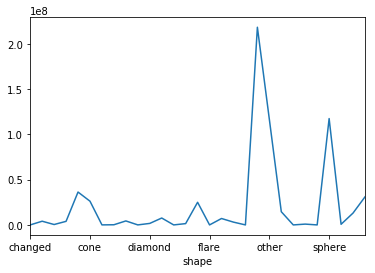

In [185]:
shape_times.plot()

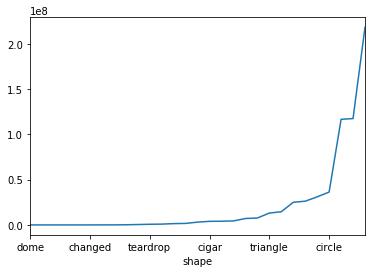

In [189]:
shape_times.sort_values().plot()

In [201]:
shape_times.nlargest(5)

shape
light      2.181668e+08
sphere     1.173682e+08
other      1.165627e+08
circle     3.627088e+07
unknown    3.097290e+07
Name: duration_seconds, dtype: float64

In [203]:
shape_state = ufo.groupby(["state", "shape"])

In [205]:
times = shape_state["duration_seconds"].sum()

In [210]:
times.loc[ ["il", "mi", "oh"], ["sphere", "unknown"] ]

state  shape  
il     sphere      90337.00
       unknown    130649.50
mi     sphere     126384.30
       unknown    232625.00
oh     sphere     132796.50
       unknown    702877.05
Name: duration_seconds, dtype: float64

In [212]:
times.loc["il":"ok", "sphere":"unknown"]

state  shape   
il     sphere        90337.00
       teardrop      11508.00
       triangle     319862.01
       unknown      130649.50
in     sphere        64863.00
       teardrop       2528.00
       triangle     144674.00
       unknown      357716.00
ks     sphere        19858.00
       teardrop       6457.00
       triangle      39154.00
       unknown      211927.00
ky     sphere        32884.00
       teardrop       3420.00
       triangle      84589.50
       unknown       70038.00
la     sphere        69414.00
       teardrop       8852.00
       triangle      34620.00
       unknown     6356899.00
ma     sphere        81274.00
       teardrop       3847.00
       triangle      82519.00
       unknown      195458.00
mb     sphere         8690.00
       triangle      46193.00
       unknown       23527.00
md     sphere        47169.00
       teardrop       1777.00
       triangle      86253.00
                      ...    
nj     sphere        92185.00
       teardrop       33

In [217]:
unsorted_nonsense = times.sort_index()

In [219]:
unsorted_nonsense.loc["il":"ok"]

state  shape    
il     changing       104672.00
       chevron         12885.00
       cigar           27140.00
       circle         248601.50
       cone             2404.00
       cross            2135.00
       cylinder        21268.00
       diamond         15441.00
       disk           109203.50
       egg            283910.00
       fireball        80942.00
       flash           15532.00
       formation       80328.75
       light          474224.81
       other          111285.00
       oval            87292.00
       rectangle       15598.00
       sphere          90337.00
       teardrop        11508.00
       triangle       319862.01
       unknown        130649.50
in     changing        24620.00
       chevron          1228.00
       cigar           16922.00
       circle          93794.50
       cone            16203.00
       cross              20.00
       cylinder         6960.00
       delta           14400.00
       diamond         13854.00
                       

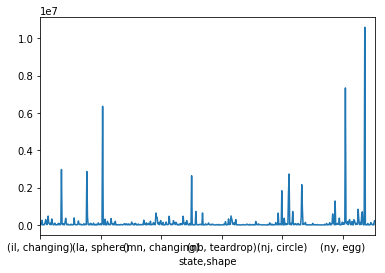

In [221]:
unsorted_nonsense.loc["il":"ok"].plot()

In [226]:
ufo.set_index("date", inplace=True)

In [228]:
ufo.resample("A")["duration_seconds"].sum()

date
1906-12-31    1.080000e+04
1907-12-31             NaN
1908-12-31             NaN
1909-12-31             NaN
1910-12-31    2.400000e+02
1911-12-31             NaN
1912-12-31             NaN
1913-12-31             NaN
1914-12-31             NaN
1915-12-31             NaN
1916-12-31    6.000000e+01
1917-12-31             NaN
1918-12-31             NaN
1919-12-31             NaN
1920-12-31    6.000000e+01
1921-12-31             NaN
1922-12-31             NaN
1923-12-31             NaN
1924-12-31             NaN
1925-12-31    6.000000e+01
1926-12-31             NaN
1927-12-31             NaN
1928-12-31             NaN
1929-12-31    6.000000e+01
1930-12-31    1.200000e+03
1931-12-31    1.860000e+03
1932-12-31             NaN
1933-12-31    1.800000e+03
1934-12-31    5.000000e+00
1935-12-31             NaN
                  ...     
1985-12-31    2.351740e+05
1986-12-31    2.206870e+05
1987-12-31    2.898583e+06
1988-12-31    5.649914e+06
1989-12-31    5.467870e+05
1990-12-31    2.728360e

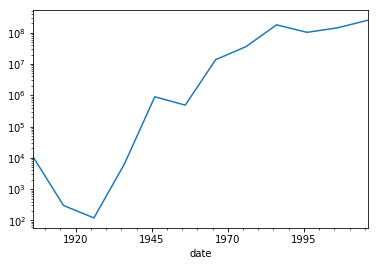

In [233]:
myplot = ufo.resample("10A")["duration_seconds"].sum().plot()
myplot.set_yscale('log')

In [235]:
r = ufo.resample("10A")

In [237]:
r["duration_seconds"].sum()

date
1906-12-31    1.080000e+04
1916-12-31    3.000000e+02
1926-12-31    1.200000e+02
1936-12-31    6.305000e+03
1946-12-31    8.942870e+05
1956-12-31    4.835465e+05
1966-12-31    1.371158e+07
1976-12-31    3.597365e+07
1986-12-31    1.781056e+08
1996-12-31    1.026377e+08
2006-12-31    1.426284e+08
2016-12-31    2.498924e+08
Freq: 10A-DEC, Name: duration_seconds, dtype: float64

In [240]:
ufo.resample("W")["duration_seconds"].sum()

date
1906-11-11      10800.00
1906-11-18           NaN
1906-11-25           NaN
1906-12-02           NaN
1906-12-09           NaN
1906-12-16           NaN
1906-12-23           NaN
1906-12-30           NaN
1907-01-06           NaN
1907-01-13           NaN
1907-01-20           NaN
1907-01-27           NaN
1907-02-03           NaN
1907-02-10           NaN
1907-02-17           NaN
1907-02-24           NaN
1907-03-03           NaN
1907-03-10           NaN
1907-03-17           NaN
1907-03-24           NaN
1907-03-31           NaN
1907-04-07           NaN
1907-04-14           NaN
1907-04-21           NaN
1907-04-28           NaN
1907-05-05           NaN
1907-05-12           NaN
1907-05-19           NaN
1907-05-26           NaN
1907-06-02           NaN
                 ...    
2013-10-20     113983.50
2013-10-27     218682.50
2013-11-03     192999.00
2013-11-10     218170.00
2013-11-17    1376755.50
2013-11-24     432983.00
2013-12-01     149513.50
2013-12-08     130273.00
2013-12-15      7797

In [252]:
day_of_week = ufo.index.dayofweek

In [253]:
ufo["day_of_week"] = day_of_week

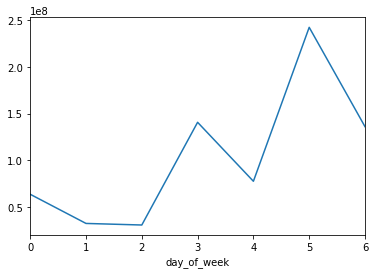

In [257]:
ufo.groupby("day_of_week")["duration_seconds"].sum().plot()

In [260]:
ufo.groupby("state").sum().loc["tx"]

duration_seconds    8.719429e+06
latitude            1.144141e+05
longitude          -3.584412e+05
day_of_week         1.137300e+04
Name: tx, dtype: float64

In [261]:
ufo.reset_index()

,date,city,state,country,shape,duration_seconds,duration_reported,description,report_date,latitude,longitude,day_of_week
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111,0
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082,0
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667,0
3,1956-10-10 21:00:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833,2
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611,0
5,1961-10-10 19:00:00,bristol,tn,us,sphere,300.0,5 minutes,My father is now 89 my brother 52 the girl wit...,2007-04-27,36.595000,-82.188889,1
6,1965-10-10 21:00:00,penarth (uk/wales),NaN,gb,circle,180.0,about 3 mins,penarth uk circle 3mins stayed 30ft above m...,2006-02-14,51.434722,-3.180000,6
7,1965-10-10 23:45:00,norwalk,ct,us,disk,1200.0,20 minutes,A bright orange color changing to reddish colo...,1999-10-02,41.117500,-73.408333,6
8,1966-10-10 20:00:00,pell city,al,us,disk,180.0,3 minutes,Strobe Lighted disk shape object observed clos...,2009-03-19,33.586111,-86.286111,0
9,1966-10-10 21:00:00,live oak,fl,us,disk,120.0,several minutes,Saucer zaps energy from powerline as my pregna...,2005-05-11,30.294722,-82.984167,0


In [263]:
week = ufo.set_index( ["day_of_week", "state", "shape"] )

In [275]:
week.loc[, 'il', 'cigar']

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:1325: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


UnsortedIndexError: 'MultiIndex Slicing requires the index to be fully lexsorted tuple len (3), lexsort depth (0)'

In [278]:
new_week = week.sort_index()

city  \
day_of_week state shape                                                          
0           ab    cigar                                        brooks (canada)   
                  cigar                                      edmonton (canada)   
                  cigar                                      edmonton (canada)   
                  circle                                     edmonton (canada)   
                  circle                                      airdrie (canada)   
                  cone                                 grande prairie (canada)   
                  cylinder                                   edmonton (canada)   
                  disk                                    bragg creek (canada)   
                  disk                                     st. albert (canada)   
                  fireball                                    canmore (canada)   
                  fireball                                    calgary (canada)   
                  fireball                                   edmonton (canada)   
                  flash                                    whitecourt (canada)   
                  flash                   waiparous (west of calgary) (canada)   
                  flash                                       lacombe (canada)   
                  formation                                   calgary (canada)   
                  formation                                  edmonton (canada)   
                  formation                                  edmonton (canada)   
                  formation                                  edmonton (canada)   
                  formation                                  edmonton (canada)   
                  formation                                  edmonton (canada)   
                  light                                      barrhead (canada)   
                  light                                        ponoka (canada)   
                  light                                    lethbridge (canada)   
                  light                                     cold lake (canada)   
                  light                                       calgary (canada)   
                  light                             nanton (north of) (canada)   
                  light                                       calgary (canada)   
                  light                                      edmonton (canada)   
                  light                                  pidgeon lake (canada)   
...                                                                        ...   
2           NaN   unknown                          paredes de coura (portugal)   
                  unknown    utrecht/amsterdam (between; utrecht&#44 noord)...   
                  unknown                          atlantic ocean (off africa)   
                  unknown                                 putten (netherlands)   
                  unknown                               leicester (uk/england)   
                  unknown                                      zadar (croatia)   
                  unknown                                               europe   
                  unknown                              scunthorpe (uk/england)   
                  unknown                              axminister (uk/england)   
                  unknown                                  london (uk/england)   
                  unknown                              dirksland (netherlands)   
                  unknown            barra do tejuco (rio de janeiro) (brazil)   
                  unknown                                broadway (uk/england)   
                  unknown                                  lierskogen (norway)   
                  unknown                                  oxford (uk/england)   
                  unknown                       warnambool&#44 vic (australia)   
                  NaN                                   

In [285]:
ufo = ufo.reset_index()

In [289]:
ufo.index = ufo.date
ufo.index.dayofweek

Int64Index([0, 0, 0, 2, 0, 1, 6, 6, 0, 0,
            ...
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           dtype='int64', name='date', length=80332)